In this project, I'd like to practice on how to create a 3D spike map. This is something I've seen going around and thought it was cool. As starter, this project uses population data in New York.

Step 1: Importing Libraries and Reading Data

I would like to get an understanding on how the data is presented, so I can have a better sense on how to clean and process them. Thus the first stage is reading the statistical and spatial data.

In [1]:
import pandas as pd
import geopandas as gpd
import pydeck as pdk

In [2]:
#Reading the Population Data
df=pd.read_csv(r"C:\Users\Shell\Desktop\Self Upgrade\Python\Portfolio Building\3D Map\DECENNIALDHC2020.P1_2025-11-16T063522\DECENNIALDHC2020.P1-Data.csv")
df.head(10)

,GEO_ID,NAME,P1_001N,Unnamed: 3
0,Geography,Geographic Area Name,!!Total,NaN
1,1400000US36001000100,Census Tract 1; Albany County; New York,2073,NaN
2,1400000US36001000201,Census Tract 2.01; Albany County; New York,3125,NaN
3,1400000US36001000202,Census Tract 2.02; Albany County; New York,2598,NaN
4,1400000US36001000301,Census Tract 3.01; Albany County; New York,3190,NaN
5,1400000US36001000302,Census Tract 3.02; Albany County; New York,3496,NaN
6,1400000US36001000401,Census Tract 4.01; Albany County; New York,2216,NaN
7,1400000US36001000403,Census Tract 4.03; Albany County; New York,4418,NaN
8,1400000US36001000404,Census Tract 4.04; Albany County; New York,5194,NaN
9,1400000US36001000501,Census Tract 5.01; Albany County; New York,3440,NaN


In [3]:
df.shape

(5412, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5412 entries, 0 to 5411
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GEO_ID      5412 non-null   object 
 1   NAME        5412 non-null   object 
 2   P1_001N     5412 non-null   object 
 3   Unnamed: 3  0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 169.3+ KB


In [5]:
#Reading the shape file
gdf = gpd.read_file(r"C:\Users\Shell\Desktop\Self Upgrade\Python\Portfolio Building\3D Map\tl_2020_36_tract\tl_2020_36_tract.shp")
gdf.head(10)

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,36,047,000700,36047000700,7,Census Tract 7,G5020,S,176774,0,+40.6923505,-073.9973434,"POLYGON ((-74.00154 40.69279, -74.00132 40.693..."
1,36,047,000900,36047000900,9,Census Tract 9,G5020,S,163469,0,+40.6917206,-073.9916018,"POLYGON ((-73.99405 40.6909, -73.99374 40.6915..."
2,36,047,001100,36047001100,11,Census Tract 11,G5020,S,168507,0,+40.6932903,-073.9877087,"POLYGON ((-73.99073 40.69305, -73.99045 40.693..."
3,36,047,001300,36047001300,13,Census Tract 13,G5020,S,293167,0,+40.6976150,-073.9883586,"POLYGON ((-73.99141 40.69863, -73.99131 40.699..."
4,36,047,002000,36047002000,20,Census Tract 20,G5020,S,154138,0,+40.6480407,-074.0159276,"POLYGON ((-74.01867 40.64741, -74.01809 40.647..."
5,36,047,002100,36047002100,21,Census Tract 21,G5020,S,528955,39281,+40.7034471,-073.9871024,"POLYGON ((-73.99507 40.7031, -73.99481 40.7033..."
6,36,047,002200,36047002200,22,Census Tract 22,G5020,S,340046,0,+40.6434585,-074.0216933,"POLYGON ((-74.02669 40.6397, -74.0266 40.63979..."
7,36,047,002901,36047002901,29.01,Census Tract 29.01,G5020,S,109261,0,+40.6949933,-073.9780959,"POLYGON ((-73.98039 40.69651, -73.97953 40.696..."
8,36,047,003400,36047003400,34,Census Tract 34,G5020,S,477399,2570730,+40.6404176,-074.0334392,"POLYGON ((-74.05575 40.65148, -74.05535 40.652..."
9,36,047,003700,36047003700,37,Census Tract 37,G5020,S,166448,0,+40.6893925,-073.9847008,"POLYGON ((-73.98926 40.69098, -73.98911 40.691..."


In [6]:
gdf.shape

(5411, 13)

In [7]:
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5411 entries, 0 to 5410
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   5411 non-null   object  
 1   COUNTYFP  5411 non-null   object  
 2   TRACTCE   5411 non-null   object  
 3   GEOID     5411 non-null   object  
 4   NAME      5411 non-null   object  
 5   NAMELSAD  5411 non-null   object  
 6   MTFCC     5411 non-null   object  
 7   FUNCSTAT  5411 non-null   object  
 8   ALAND     5411 non-null   int64   
 9   AWATER    5411 non-null   int64   
 10  INTPTLAT  5411 non-null   object  
 11  INTPTLON  5411 non-null   object  
 12  geometry  5411 non-null   geometry
dtypes: geometry(1), int64(2), object(10)
memory usage: 549.7+ KB


To create the map, the statistical and spatial data must be combined, and this requires them to share at least one common attribute that can be used for merging. I spent some time searching for files that could be matched and combined, eventually leading me to the two data files above. 

The ‘Census Tract’ or 'GEO ID' attribute present in both datasets can be used as the common identifier. However, we need to clean the statistical data first, as this attribute does not appear as a standalone column.

Step 2: Data Cleaning

Here is what I'm going to do for the statistical data:
1. Drop the Unnamed:3 column and row 0
2.  Parsing the Geographic Area Name into Census Tract, County, and State
3.  Rename P1_001N to PopulationSize
4.  Change Dtype of PopulationSize to int
5.  Add a new column called GEO_ID which contains the last 11 numbers of GEOID

and for the spatial data:
1. Rename Namelsad to Census Tract

In [8]:
#Cleaning statistical data [1],[3],[4]
dfcleaned= (
    df.drop(columns=['Unnamed: 3'],index=[0]).
    rename(columns={'P1_001N':'PopulationSize'}).
    astype({'PopulationSize':'int'})
)
dfcleaned.head()

,GEO_ID,NAME,PopulationSize
1,1400000US36001000100,Census Tract 1; Albany County; New York,2073
2,1400000US36001000201,Census Tract 2.01; Albany County; New York,3125
3,1400000US36001000202,Census Tract 2.02; Albany County; New York,2598
4,1400000US36001000301,Census Tract 3.01; Albany County; New York,3190
5,1400000US36001000302,Census Tract 3.02; Albany County; New York,3496


In [9]:
#Parsing [2]. I'm using Lambda as we're doing multi-step parsing -> splitting and then taking certain element.
dfcleaned['CensusTract'] = dfcleaned['NAME'].apply(lambda x: x.split(";")[0])
dfcleaned['County'] = dfcleaned['NAME'].apply(lambda x: x.split(";")[1])
dfcleaned['State'] = dfcleaned['NAME'].apply(lambda x: x.split(";")[2])

#Create new column and slice GEO_ID. I'm not using lambda as it is a simple parsing.
dfcleaned['GEOID']=dfcleaned['GEO_ID'].str[-11:]

#Getting an idea on how the results look like
dfcleaned.head()

,GEO_ID,NAME,PopulationSize,CensusTract,County,State,GEOID
1,1400000US36001000100,Census Tract 1; Albany County; New York,2073,Census Tract 1,Albany County,New York,36001000100
2,1400000US36001000201,Census Tract 2.01; Albany County; New York,3125,Census Tract 2.01,Albany County,New York,36001000201
3,1400000US36001000202,Census Tract 2.02; Albany County; New York,2598,Census Tract 2.02,Albany County,New York,36001000202
4,1400000US36001000301,Census Tract 3.01; Albany County; New York,3190,Census Tract 3.01,Albany County,New York,36001000301
5,1400000US36001000302,Census Tract 3.02; Albany County; New York,3496,Census Tract 3.02,Albany County,New York,36001000302


In [10]:
#Cleaning Spatial Data
gdfcleaned=gdf.rename(columns={'NAMELSAD':'CensusTract'})
gdfcleaned.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,CensusTract,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,36,047,000700,36047000700,7,Census Tract 7,G5020,S,176774,0,+40.6923505,-073.9973434,"POLYGON ((-74.00154 40.69279, -74.00132 40.693..."
1,36,047,000900,36047000900,9,Census Tract 9,G5020,S,163469,0,+40.6917206,-073.9916018,"POLYGON ((-73.99405 40.6909, -73.99374 40.6915..."
2,36,047,001100,36047001100,11,Census Tract 11,G5020,S,168507,0,+40.6932903,-073.9877087,"POLYGON ((-73.99073 40.69305, -73.99045 40.693..."
3,36,047,001300,36047001300,13,Census Tract 13,G5020,S,293167,0,+40.6976150,-073.9883586,"POLYGON ((-73.99141 40.69863, -73.99131 40.699..."
4,36,047,002000,36047002000,20,Census Tract 20,G5020,S,154138,0,+40.6480407,-074.0159276,"POLYGON ((-74.01867 40.64741, -74.01809 40.647..."


Step 3: Further Data Processing

1. Merging spatial and statistical information
2. Converting them to JSON

In [11]:
#Merging Statistical and Spatial Data. The spatial data need to be the "main" file where the data is merged into.
CombinedGDF=pd.merge(gdfcleaned,dfcleaned,how="left",on="GEOID")
CombinedGDF.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME_x,CensusTract_x,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,GEO_ID,NAME_y,PopulationSize,CensusTract_y,County,State
0,36,047,000700,36047000700,7,Census Tract 7,G5020,S,176774,0,+40.6923505,-073.9973434,"POLYGON ((-74.00154 40.69279, -74.00132 40.693...",1400000US36047000700,Census Tract 7; Kings County; New York,4415,Census Tract 7,Kings County,New York
1,36,047,000900,36047000900,9,Census Tract 9,G5020,S,163469,0,+40.6917206,-073.9916018,"POLYGON ((-73.99405 40.6909, -73.99374 40.6915...",1400000US36047000900,Census Tract 9; Kings County; New York,5167,Census Tract 9,Kings County,New York
2,36,047,001100,36047001100,11,Census Tract 11,G5020,S,168507,0,+40.6932903,-073.9877087,"POLYGON ((-73.99073 40.69305, -73.99045 40.693...",1400000US36047001100,Census Tract 11; Kings County; New York,1578,Census Tract 11,Kings County,New York
3,36,047,001300,36047001300,13,Census Tract 13,G5020,S,293167,0,+40.6976150,-073.9883586,"POLYGON ((-73.99141 40.69863, -73.99131 40.699...",1400000US36047001300,Census Tract 13; Kings County; New York,2465,Census Tract 13,Kings County,New York
4,36,047,002000,36047002000,20,Census Tract 20,G5020,S,154138,0,+40.6480407,-074.0159276,"POLYGON ((-74.01867 40.64741, -74.01809 40.647...",1400000US36047002000,Census Tract 20; Kings County; New York,1694,Census Tract 20,Kings County,New York


In [12]:
#Cleaning the merged data
CombinedGDFCleaned=(
    CombinedGDF.drop(columns={'STATEFP','CensusTract_x','GEO_ID','MTFCC','FUNCSTAT','COUNTYFP','TRACTCE','NAME_x','NAME_y'}).
    rename(columns={'CensusTract_y':'CensusTract'})
)
CombinedGDFCleaned.head()

,GEOID,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,PopulationSize,CensusTract,County,State
0,36047000700,176774,0,+40.6923505,-073.9973434,"POLYGON ((-74.00154 40.69279, -74.00132 40.693...",4415,Census Tract 7,Kings County,New York
1,36047000900,163469,0,+40.6917206,-073.9916018,"POLYGON ((-73.99405 40.6909, -73.99374 40.6915...",5167,Census Tract 9,Kings County,New York
2,36047001100,168507,0,+40.6932903,-073.9877087,"POLYGON ((-73.99073 40.69305, -73.99045 40.693...",1578,Census Tract 11,Kings County,New York
3,36047001300,293167,0,+40.6976150,-073.9883586,"POLYGON ((-73.99141 40.69863, -73.99131 40.699...",2465,Census Tract 13,Kings County,New York
4,36047002000,154138,0,+40.6480407,-074.0159276,"POLYGON ((-74.01867 40.64741, -74.01809 40.647...",1694,Census Tract 20,Kings County,New York


In [13]:
#Checking if the merge ran well
CombinedGDFCleaned.shape

(5411, 10)

In [14]:
CombinedGDFCleaned.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5411 entries, 0 to 5410
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   GEOID           5411 non-null   object  
 1   ALAND           5411 non-null   int64   
 2   AWATER          5411 non-null   int64   
 3   INTPTLAT        5411 non-null   object  
 4   INTPTLON        5411 non-null   object  
 5   geometry        5411 non-null   geometry
 6   PopulationSize  5411 non-null   int64   
 7   CensusTract     5411 non-null   object  
 8   County          5411 non-null   object  
 9   State           5411 non-null   object  
dtypes: geometry(1), int64(3), object(6)
memory usage: 422.9+ KB


In [15]:
#Converting files to JSON (lighter, better)
CombinedGDFCleaned.to_file("cleaneddata.geojson", driver="GeoJSON")

In [16]:
#reading JSON
jsonfile = gpd.read_file(r"C:\Users\Shell\Desktop\Self Upgrade\Python\Portfolio Building\3D Map\cleaneddata.geojson")

In [17]:
# Normalization: The purpose of this step is to scale our data so it matches the range required for color values. So we have better control on deciding the colour of the maps.
# Colour values is between 0 - 255, so we need to normalize the data to that range.
# How do we do that? we try to rescale the data into 0-1 range first, and from this we got a relative position of each value, which we will multiply by 255.

pmin = jsonfile["PopulationSize"].min()
pmax = jsonfile["PopulationSize"].max()

jsonfile["PopSizeNorm"] = jsonfile["PopulationSize"].apply(
    lambda x: 255 * ((x - pmin) / (pmax - pmin))
)

In [18]:
jsonfile.describe()

,ALAND,AWATER,PopulationSize,PopSizeNorm
count,5.411000e+03,5.411000e+03,5411.000000,5411.000000
mean,2.255582e+07,3.558815e+06,3733.367030,55.278632
std,7.824451e+07,6.390996e+07,1765.101256,26.135224
min,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.970450e+05,0.000000e+00,2489.500000,36.861137
50%,1.105597e+06,0.000000e+00,3578.000000,52.978167
75%,6.138034e+06,1.911185e+05,4762.500000,70.516636
max,1.828344e+09,2.713595e+09,17222.000000,255.000000


In [19]:
#Checking if there are null values
jsonfile.isnull().sum()

GEOID             0
ALAND             0
AWATER            0
INTPTLAT          0
INTPTLON          0
PopulationSize    0
CensusTract       0
County            0
State             0
geometry          0
PopSizeNorm       0
dtype: int64

No null value, means the data is good to go!

Step 4: Creating Maps

In [ ]:
# In creating the 3D maps, I'm using Pydeck
# The parameters reference: https://deckgl.readthedocs.io/en/latest/gallery/geojson_layer.html

# Designing the view state
INITIAL_VIEW_STATE = pdk.ViewState(
    latitude=40.71427,
    longitude=-74.00597,
    zoom=9,
    max_zoom=16,
    pitch=45,
    bearing=0
)

#Designing the map
designedmap = pdk.Layer(
    "GeoJsonLayer",
    jsonfile,
    opacity=1,
    stroked=False,
    filled=True,
    extruded=True,
    wireframe=False,
    pickable=True,
    get_elevation="PopulationSize",
    get_fill_color="PopulationSize==0?[0,0,0,0]:[PopSizeNorm, 0, 255-PopSizeNorm]",
    #Above and below shows an if function. If Population size is 0, then the colour is [x,y,z,a]. The first three is code for RGB while the last implies opacity.
    #if Population size is not 0, then the colour will follow the [X1,y2,z2] following :. These three are also code for RGB. 
    #We can create the colour based on the population size (and gradient - in which case we do normalization process that takes quite sometime, thus I opted out)
    get_line_color="PopulationSize==0?[0,0,0,0]:[PopSizeNorm+50, PopSizeNorm+50, PopSizeNorm+50]",
)

# Combining the view state and the map
Map3D = pdk.Deck(layers=[designedmap], initial_view_state=INITIAL_VIEW_STATE)

# Exporting as an html file
Map3D.to_html("3dmap.html")


The size of the interactive HTML output is too big to upload in the github repository. Here is the JPEG illustration instead :)

<Figure size 1200x600 with 0 Axes>

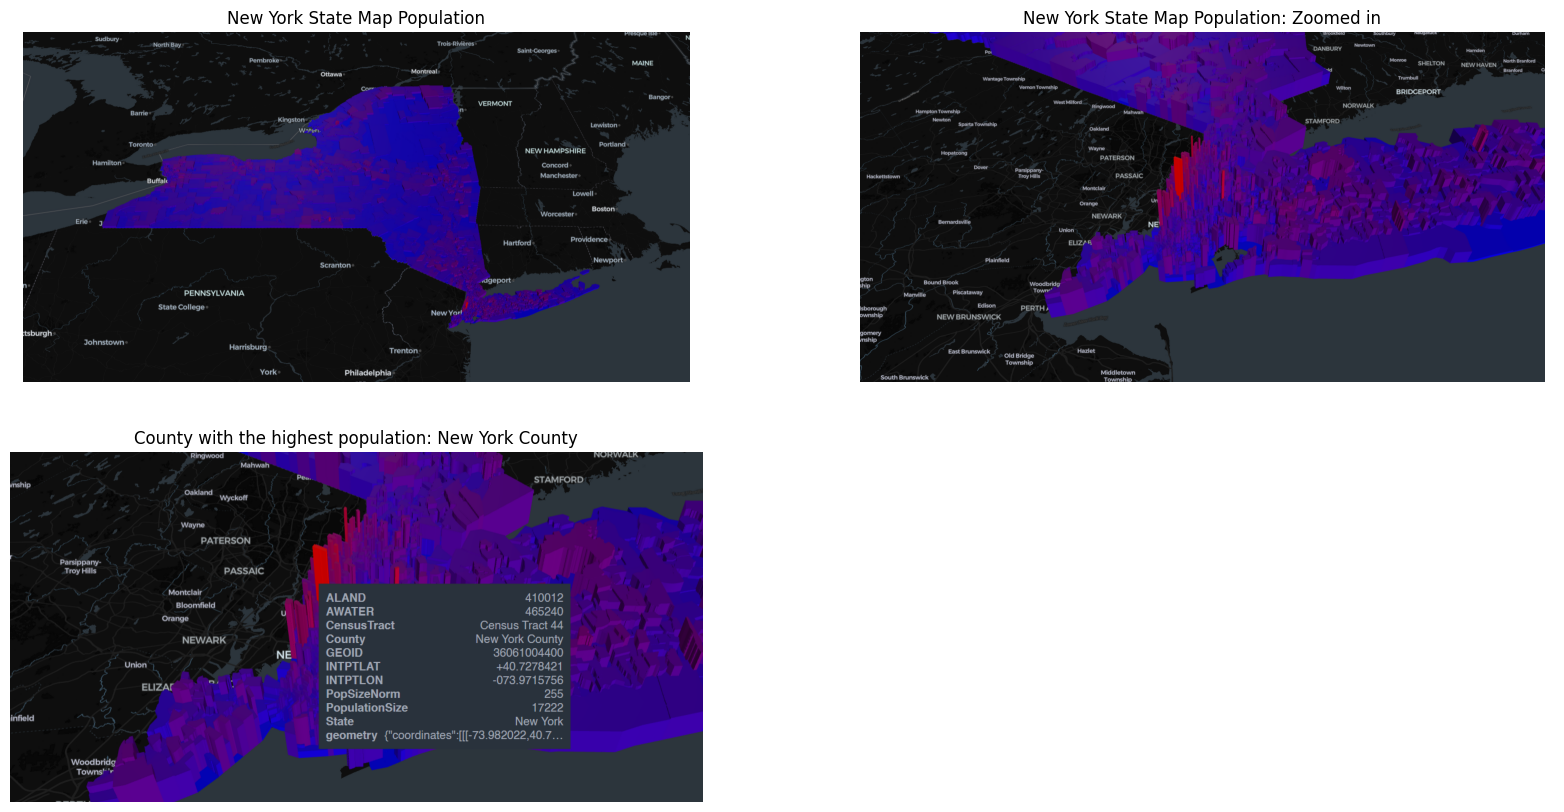

In [35]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

NY1=mpimg.imread(r"C:\Users\Shell\Desktop\Self Upgrade\Python\Portfolio Building\3D Map\NewYork3DMap0.png")
NY2=mpimg.imread(r"C:\Users\Shell\Desktop\Self Upgrade\Python\Portfolio Building\3D Map\NewYork3DMap1.png")
NY3=mpimg.imread(r"C:\Users\Shell\Desktop\Self Upgrade\Python\Portfolio Building\3D Map\NewYork3DMap2.png")

plt.figure(figsize=(12,6))

thecanvas = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
fig, ((ax1, ax2), (ax3, ax4)) = thecanvas

#Showing the photos
ax1.imshow(NY1)
ax2.imshow(NY2)
ax3.imshow(NY3)

#Removing axis
for ax in [ax1, ax2, ax3, ax4]:
    ax.axis('off')
#Adding titles
ax1.set_title("New York State Map Population")
ax2.set_title("New York State Map Population: Zoomed in")
ax3.set_title("County with the highest population: New York County")

plt.show()

The map showcases significant spike (and a stronger red colour) in New York country, illustrating a higher population number in the area.